## Correlation Plot between the velocity of two keypoints

In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
from src.animal import AnimalList
from scripts.tools.ground_truth_toml_reader import GroundTruth
from src.loader import InstanceLoader

data_folder = Path("/Users/persie/PhD_Code/3d_ant_data_rle/")
session_list = [6,10,11,13,17,19,20,21,22,23,28,29,30]
obj_ref_frame = [500,180,380,849,459, 59, 842, 24, 93, 176, 2626, 595, 241 ]
prefix = "240905-1616"
skeleton_toml_path = "../skeleton.toml"


In [2]:
from scripts.tools.animal_dataframe import AnimalDataFrame
import numpy as np
node_of_interest = ['a_L2', 'a_R2']
_velocity_array = np.empty((10000000, len(node_of_interest)), dtype=np.float64)
n_samples = 0

In [3]:
for experiment_i, session in enumerate(session_list):
    animal_pkl = data_folder / prefix / "outputs" / "tracking" / f"linked_tracks_session{session}.pkl"


    gt = GroundTruth(data_folder, prefix, session)
    track_list = gt["tracks"]
    enter_frame = gt["enter"]
    touch_frame = gt["touch"]
    exit_frame = gt["exit"]
    grasp_frame = gt["grasp"]

    animal_list = AnimalList(toml_path=skeleton_toml_path, pose_pkl=animal_pkl, track_number=track_list)

    frame_list = [*range(touch_frame, grasp_frame)]
    # frame_list = [*range(enter_frame, touch_frame)]

    for animal in animal_list.animals:

        adf = AnimalDataFrame(animal, frame_list, node_of_interest, signed=True)
        velocity_df = adf.velocity_mag(clean=False)
        # displace_z_df = adf.displace_xyz(clean=False).xs('z', level="Axis")
        #Get only samples where all are not nan
        not_na = velocity_df.dropna(axis=1).T

        #Extract the datapoints and add them to an array
        _velocity_array[n_samples: n_samples + len(not_na), :] = not_na
        n_samples += len(not_na)

/Users/persie/PycharmProjects/3d_ant_analysis/.venv/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Users/persie/PycharmProjects/3d_ant_analysis/.venv/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Users/persie/PycharmProjects/3d_ant_analysis/.venv/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Users/persie/PycharmProjects/3d_ant_analysis/.venv/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Users/persie/PycharmProjects/3d_ant_analysis/.venv/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty sli

In [4]:
_velocity_array_trim = _velocity_array[_velocity_array.any(axis=1)]

In [80]:
#Add a velocity cap
# cap_vel_array = _velocity_array_trim[_velocity_array_trim < 40]
cap_vel_array = _velocity_array_trim[(np.abs(_velocity_array_trim) < 50).all(axis=1)]
# _velocity_array_trim: 4832
# cal_vel_array: 4185

In [81]:
4185/4832

0.8661009933774835

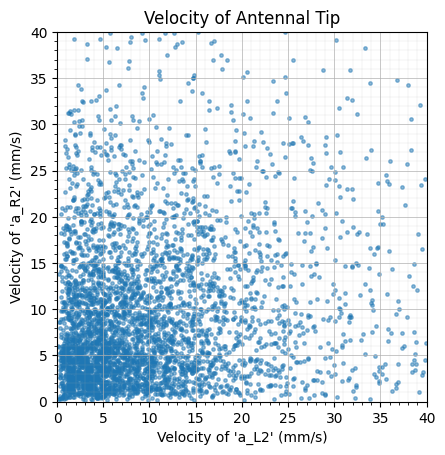

In [16]:
lim = 50
fig, ax = plt.subplots()
# cap_vel_array = _velocity_array_trim[(np.abs(_velocity_array_trim) < lim).all(axis=1)]
ax.scatter(cap_vel_array[:, 0], cap_vel_array[:, 1], marker='o', s=6, alpha=0.5)

plt.title("Velocity of Antennal Tip")
ax.set_xlabel("Velocity of 'a_L2' (mm/s)")
ax.set_ylabel("Velocity of 'a_R2' (mm/s)")
ax.set_aspect('equal', adjustable='box')
ax.set_xlim(0, lim)
ax.set_ylim(0, lim)
ax.grid(visible=True, which='major', linestyle='-', linewidth=0.5)
ax.grid(visible=True, which='minor', linestyle='-', linewidth=0.1)
ax.minorticks_on()


# plt.savefig("/Users/persie/Library/CloudStorage/OneDrive-UniversityofEdinburgh/PhD/Figures/Thesis Figures/Experiment Analysis/antenna_velocity_LR_cap.svg")
plt.show()


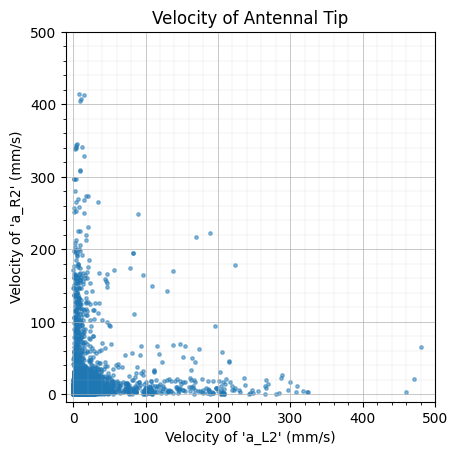

In [14]:
fig, ax = plt.subplots()
ax.scatter(_velocity_array_trim[:, 0], _velocity_array_trim[:, 1], marker='o', s=6, alpha=0.5)

plt.title("Velocity of Antennal Tip")
ax.set_xlabel("Velocity of 'a_L2' (mm/s)")
ax.set_ylabel("Velocity of 'a_R2' (mm/s)")
ax.set_aspect('equal', adjustable='box')
ax.set_xlim(-10, 500)
ax.set_ylim(-10, 500)
ax.grid(visible=True, which='major', linestyle='-', linewidth=0.5)
ax.grid(visible=True, which='minor', linestyle='-', linewidth=0.1)
ax.minorticks_on()


# plt.savefig("/Users/persie/Library/CloudStorage/OneDrive-UniversityofEdinburgh/PhD/Figures/Thesis Figures/Experiment Analysis/antenna_velocity_LR.svg")
plt.show()


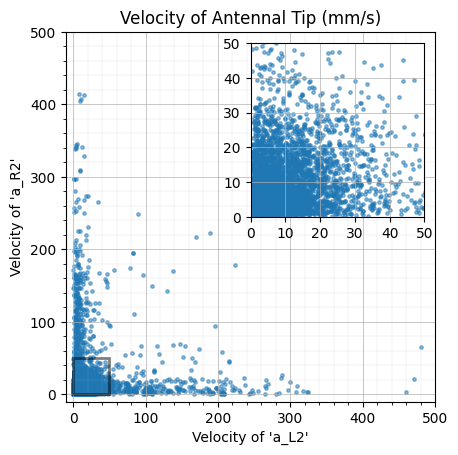

In [78]:
plt.rcParams['svg.fonttype'] = 'none'

Z = _velocity_array_trim
Z2 = _velocity_array_trim[(np.abs(_velocity_array_trim) < 50).all(axis=1)]

fig, ax = plt.subplots()
plt.title("Velocity of Antennal Tip (mm/s)")
ax.scatter(Z[:, 0], Z[:, 1], marker='o', s=6, alpha=0.5)
ax.set_xlabel("Velocity of 'a_L2'")
ax.set_ylabel("Velocity of 'a_R2'")
ax.set_aspect('equal', adjustable='box')
ax.set_xlim(-10, 500)
ax.set_ylim(-10, 500)
ax.grid(visible=True, which='major', linestyle='-', linewidth=0.5)
ax.grid(visible=True, which='minor', linestyle='-', linewidth=0.1)
ax.minorticks_on()

x1, x2, y1, y2 = (0, 50, 0, 50)  # subregion of the original image
axins = ax.inset_axes(
    [0.5, 0.5, 0.47, 0.47],
    xlim=(x1, x2), ylim=(y1, y2))
axins.grid(visible=True, which='major', linestyle='-', linewidth=0.5)
axins.grid(visible=True, which='minor', linestyle='-', linewidth=0.1)
axins.scatter(Z2[:, 0], Z2[:, 1], marker='o', s=6, alpha=0.5)
axins.set_xlim(0, 50)
axins.set_ylim(0, 50)
axins.set_xticks([0, 10, 20, 30, 40, 50])



ax.indicate_inset_zoom(axins, edgecolor="black", linewidth=2)
# plt.savefig("/Users/persie/Library/CloudStorage/OneDrive-UniversityofEdinburgh/PhD/Figures/Thesis Figures/Experiment Analysis/antenna_velocity_inset.svg")
plt.show()


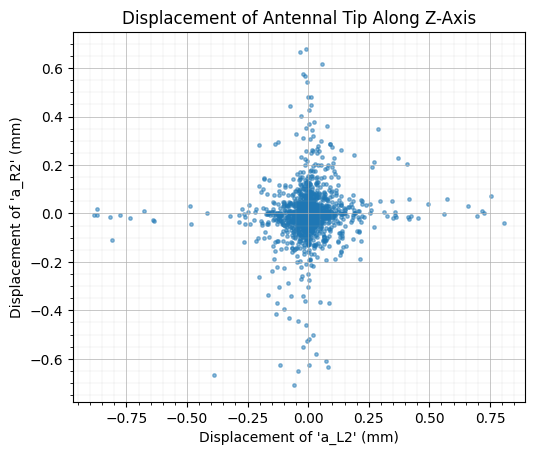

In [24]:
fig, ax = plt.subplots()
ax.scatter(cap_vel_array[:, 0], cap_vel_array[:, 1], marker='o', s=6, alpha=0.5)
ax.set_xlim(-10, 500)
ax.set_ylim(-10, 500)

plt.title("Displacement of Antennal Tip Along Z-Axis")
ax.set_xlabel("Displacement of 'a_L2' (mm)")
ax.set_ylabel("Displacement of 'a_R2' (mm)")
ax.set_aspect('equal', adjustable='box')
ax.grid(visible=True, which='major', linestyle='-', linewidth=0.5)
ax.grid(visible=True, which='minor', linestyle='-', linewidth=0.1)
ax.minorticks_on()


# plt.savefig("/Users/persie/Library/CloudStorage/OneDrive-UniversityofEdinburgh/PhD/Figures/Thesis Figures/Experiment Analysis/antenna_displace_Z_LR_cap.svg")
plt.show()

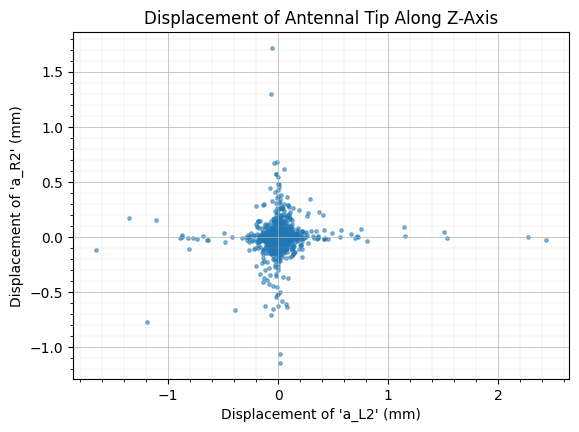

In [25]:
fig, ax = plt.subplots()
ax.scatter(_velocity_array_trim[:, 0], _velocity_array_trim[:, 1], marker='o', s=6, alpha=0.5)

plt.title("Displacement of Antennal Tip Along Z-Axis")
ax.set_xlabel("Displacement of 'a_L2' (mm)")
ax.set_ylabel("Displacement of 'a_R2' (mm)")
ax.set_aspect('equal', adjustable='box')
ax.grid(visible=True, which='major', linestyle='-', linewidth=0.5)
ax.grid(visible=True, which='minor', linestyle='-', linewidth=0.1)
ax.minorticks_on()


# plt.savefig("/Users/persie/Library/CloudStorage/OneDrive-UniversityofEdinburgh/PhD/Figures/Thesis Figures/Experiment Analysis/antenna_displace_Z_LR.svg")
plt.show()